In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from nltk.cluster.util import cosine_distance
import networkx as nx

In [4]:
import nltk
nltk.download('stopwords')

import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suppande\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
data = pd.read_csv(r'C:/Users/suppande/Desktop/ISB/Course_Content/Capstone/Code/DataFinalClLoc.csv')
data.head()

,skillDevelopment,reviewText,location,cons,salaryBenefits,workLifeBalance,pros,workSatisfaction,postedon,jobSecurity,careerGrowth,companyCulture,company,jobFunction,overallScore,file,cleaned_location
0,1.0,Its good and managable only because of team.,Lucknow,Fake offers were given while recruiting. Wrong...,1.0,3.0,Only my collegues and work culture. There is n...,3.0,21-Apr-22,4.0,1.0,4.0,HCL Technologies,Hr Executive,1.0,hcl,Lucknow
1,4.0,Very balanced and rarely pressuring.,Noida,* Although it's WFH as of now but no general t...,2.0,5.0,Overall good experience for me! Very much secu...,4.0,16-Apr-22,5.0,4.0,3.0,HCL Technologies,Technical Lead,4.0,hcl,Noida
2,3.0,working hours are 9:30 hours no shift allowanc...,Greater Noida,Management always listen what the manager sayi...,2.0,3.0,Job security is there Client or Customer centr...,1.0,20-Apr-22,4.0,2.0,2.0,HCL Technologies,Senior Specialist,3.0,hcl,Noida
3,1.0,Too bad for a mid level experienced. Enquire p...,Chennai,Work culture is too bad and experienced so man...,1.0,2.0,It is a growing organization and has multiple ...,1.0,9-Dec-21,4.0,1.0,1.0,HCL Technologies,Senior Technical Lead,1.0,hcl,Chennai
4,1.0,Is there anything called work life balance her...,Chennai,Why not paying your employees good!? .Stop ove...,4.0,1.0,"Hcl is avery good organization,But the middle ...",1.0,4-Mar-22,4.0,1.0,1.0,HCL Technologies,Software Engineer,1.0,hcl,Chennai


In [7]:
data.head()

,skillDevelopment,reviewText,location,cons,salaryBenefits,workLifeBalance,pros,workSatisfaction,postedon,jobSecurity,careerGrowth,companyCulture,company,jobFunction,overallScore,file,cleaned_location
0,1.0,Its good and managable only because of team.,Lucknow,Fake offers were given while recruiting. Wrong...,1.0,3.0,Only my collegues and work culture. There is n...,3.0,21-Apr-22,4.0,1.0,4.0,HCL Technologies,Hr Executive,1.0,hcl,Lucknow
1,4.0,Very balanced and rarely pressuring.,Noida,* Although it's WFH as of now but no general t...,2.0,5.0,Overall good experience for me! Very much secu...,4.0,16-Apr-22,5.0,4.0,3.0,HCL Technologies,Technical Lead,4.0,hcl,Noida
2,3.0,working hours are 9:30 hours no shift allowanc...,Greater Noida,Management always listen what the manager sayi...,2.0,3.0,Job security is there Client or Customer centr...,1.0,20-Apr-22,4.0,2.0,2.0,HCL Technologies,Senior Specialist,3.0,hcl,Noida
3,1.0,Too bad for a mid level experienced. Enquire p...,Chennai,Work culture is too bad and experienced so man...,1.0,2.0,It is a growing organization and has multiple ...,1.0,9-Dec-21,4.0,1.0,1.0,HCL Technologies,Senior Technical Lead,1.0,hcl,Chennai
4,1.0,Is there anything called work life balance her...,Chennai,Why not paying your employees good!? .Stop ove...,4.0,1.0,"Hcl is avery good organization,But the middle ...",1.0,4-Mar-22,4.0,1.0,1.0,HCL Technologies,Software Engineer,1.0,hcl,Chennai


In [8]:
data=data.drop(['location'], axis=1)

In [9]:
data.head()

,skillDevelopment,reviewText,cons,salaryBenefits,workLifeBalance,pros,workSatisfaction,postedon,jobSecurity,careerGrowth,companyCulture,company,jobFunction,overallScore,file,cleaned_location
0,1.0,Its good and managable only because of team.,Fake offers were given while recruiting. Wrong...,1.0,3.0,Only my collegues and work culture. There is n...,3.0,21-Apr-22,4.0,1.0,4.0,HCL Technologies,Hr Executive,1.0,hcl,Lucknow
1,4.0,Very balanced and rarely pressuring.,* Although it's WFH as of now but no general t...,2.0,5.0,Overall good experience for me! Very much secu...,4.0,16-Apr-22,5.0,4.0,3.0,HCL Technologies,Technical Lead,4.0,hcl,Noida
2,3.0,working hours are 9:30 hours no shift allowanc...,Management always listen what the manager sayi...,2.0,3.0,Job security is there Client or Customer centr...,1.0,20-Apr-22,4.0,2.0,2.0,HCL Technologies,Senior Specialist,3.0,hcl,Noida
3,1.0,Too bad for a mid level experienced. Enquire p...,Work culture is too bad and experienced so man...,1.0,2.0,It is a growing organization and has multiple ...,1.0,9-Dec-21,4.0,1.0,1.0,HCL Technologies,Senior Technical Lead,1.0,hcl,Chennai
4,1.0,Is there anything called work life balance her...,Why not paying your employees good!? .Stop ove...,4.0,1.0,"Hcl is avery good organization,But the middle ...",1.0,4-Mar-22,4.0,1.0,1.0,HCL Technologies,Software Engineer,1.0,hcl,Chennai


In [10]:
data=data.reset_index()

In [11]:
def index_reset(df):
    df_reset=df.reset_index(drop=False)# for factor analysis to have a similar sl no of the data
    return(df_reset)

In [252]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suppande\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [253]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\suppande\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [254]:
# Extracting the desired variables for analysis
reviews = data[['company','overallScore','reviewText','cons','pros']]

## Selecting the numerical features

In [12]:
def selection(data):
    df=data[['skillDevelopment', 'salaryBenefits',
       'workLifeBalance',  'workSatisfaction', 
       'jobSecurity', 'careerGrowth', 'companyCulture']]

    df=df.dropna()
    return(df)
    

In [13]:
df=selection(data)
df.head()

,skillDevelopment,salaryBenefits,workLifeBalance,workSatisfaction,jobSecurity,careerGrowth,companyCulture
0,1.0,1.0,3.0,3.0,4.0,1.0,4.0
1,4.0,2.0,5.0,4.0,5.0,4.0,3.0
2,3.0,2.0,3.0,1.0,4.0,2.0,2.0
3,1.0,1.0,2.0,1.0,4.0,1.0,1.0
4,1.0,4.0,1.0,1.0,4.0,1.0,1.0


## Factor analysis

In [14]:
!pip install factor_analyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo
from factor_analyzer import FactorAnalyzer

In [15]:
df_reset=index_reset(df)
#df_reset=df.copy()

In [16]:
def factor(df_reset):
    fa = FactorAnalyzer(n_factors=3,rotation='oblimin')
    fa.fit(df_reset)
    df_factor_scores=pd.DataFrame(fa.transform(df_reset))
    df_reset[['Exhaustion','Depersonalization','PersonalAccomplishment']]=df_factor_scores
    fa_data=df_reset
    return(fa_data)

In [17]:
final_df=factor(df_reset)

In [18]:
final_df

,index,skillDevelopment,salaryBenefits,workLifeBalance,workSatisfaction,jobSecurity,careerGrowth,companyCulture,Exhaustion,Depersonalization,PersonalAccomplishment
0,0,1.0,1.0,3.0,3.0,4.0,1.0,4.0,-1.324421,-0.505241,-1.554899
1,1,4.0,2.0,5.0,4.0,5.0,4.0,3.0,0.181301,0.346007,-0.825013
2,2,3.0,2.0,3.0,1.0,4.0,2.0,2.0,-1.320864,-1.101628,-0.827405
3,3,1.0,1.0,2.0,1.0,4.0,1.0,1.0,-2.050294,-1.772570,-1.557231
4,4,1.0,4.0,1.0,1.0,4.0,1.0,1.0,-1.859811,-2.083037,0.677617
...,...,...,...,...,...,...,...,...,...,...,...
96245,97092,4.0,3.0,5.0,4.0,5.0,3.0,4.0,0.077751,0.495958,-0.077544
96246,97093,4.0,3.0,4.0,4.0,5.0,4.0,4.0,0.328279,0.296395,-0.088594
96247,97094,3.0,1.0,2.0,3.0,2.0,1.0,3.0,-1.233510,-1.191298,-1.534109
96248,97095,4.0,3.0,3.0,4.0,4.0,4.0,4.0,0.270762,-0.099365,-0.084428


## scaling the data frame for cluster analysis post the factor analysis

In [19]:
factor_df=final_df[['Exhaustion','PersonalAccomplishment','Depersonalization']]## selecting the two factors for clustering
factor_df

,Exhaustion,PersonalAccomplishment,Depersonalization
0,-1.324421,-1.554899,-0.505241
1,0.181301,-0.825013,0.346007
2,-1.320864,-0.827405,-1.101628
3,-2.050294,-1.557231,-1.772570
4,-1.859811,0.677617,-2.083037
...,...,...,...
96245,0.077751,-0.077544,0.495958
96246,0.328279,-0.088594,0.296395
96247,-1.233510,-1.534109,-1.191298
96248,0.270762,-0.084428,-0.099365


In [20]:
factor_df.min()

Exhaustion               -2.161190
PersonalAccomplishment   -1.657992
Depersonalization        -2.615264
dtype: float64

In [21]:
from sklearn.preprocessing import normalize

def scale(df):
    data_scaled = normalize(df)
    data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
    return(data_scaled)

In [22]:
factor_df_scaled=scale(factor_df)

In [23]:
factor_df_scaled.head()

,Exhaustion,PersonalAccomplishment,Depersonalization
0,-0.629459,-0.738999,-0.240126
1,0.198616,-0.903809,0.379053
2,-0.692048,-0.433508,-0.577183
3,-0.655924,-0.498185,-0.567076
4,-0.647224,0.235814,-0.724908


## clustering the data

In [24]:
from sklearn.cluster import KMeans

In [25]:
def cluster(factor_df_scaled):
    kmeans = KMeans( init="k-means++", n_clusters=5, n_init=10,   max_iter=300,random_state=42 )
    kmeans.fit(factor_df_scaled)
    kmeans.inertia_
    kmeans.cluster_centers_
    df_cluster=final_df
    df_cluster['cluster'] = kmeans.labels_
    return(df_cluster)

In [26]:
final_df_cluster=cluster(factor_df_scaled)

In [27]:
final_df_cluster.head(10)

,index,skillDevelopment,salaryBenefits,workLifeBalance,workSatisfaction,jobSecurity,careerGrowth,companyCulture,Exhaustion,Depersonalization,PersonalAccomplishment,cluster
0,0,1.0,1.0,3.0,3.0,4.0,1.0,4.0,-1.324421,-0.505241,-1.554899,1
1,1,4.0,2.0,5.0,4.0,5.0,4.0,3.0,0.181301,0.346007,-0.825013,1
2,2,3.0,2.0,3.0,1.0,4.0,2.0,2.0,-1.320864,-1.101628,-0.827405,4
3,3,1.0,1.0,2.0,1.0,4.0,1.0,1.0,-2.050294,-1.772570,-1.557231,4
4,4,1.0,4.0,1.0,1.0,4.0,1.0,1.0,-1.859811,-2.083037,0.677617,4
5,5,1.0,1.0,1.0,1.0,3.0,1.0,1.0,-2.107810,-2.168330,-1.553065,4
6,6,2.0,1.0,3.0,1.0,2.0,1.0,1.0,-1.946508,-1.764868,-1.556655,4
7,7,5.0,1.0,3.0,4.0,5.0,2.0,4.0,-0.299687,0.144722,-1.525522,1
8,8,3.0,1.0,3.0,1.0,4.0,1.0,1.0,-1.766785,-1.372312,-1.547296,4
9,9,2.0,1.0,1.0,1.0,2.0,1.0,1.0,-2.008159,-2.244142,-1.546477,4


In [28]:
final_df_cluster.groupby('cluster').count()

,index,skillDevelopment,salaryBenefits,workLifeBalance,workSatisfaction,jobSecurity,careerGrowth,companyCulture,Exhaustion,Depersonalization,PersonalAccomplishment
cluster,,,,,,,,,,,
0,33422,33422,33422,33422,33422,33422,33422,33422,33422,33422,33422
1,13158,13158,13158,13158,13158,13158,13158,13158,13158,13158,13158
2,16880,16880,16880,16880,16880,16880,16880,16880,16880,16880,16880
3,4866,4866,4866,4866,4866,4866,4866,4866,4866,4866,4866
4,27924,27924,27924,27924,27924,27924,27924,27924,27924,27924,27924


In [29]:
x=final_df_cluster.groupby('cluster').mean()
x

,index,skillDevelopment,salaryBenefits,workLifeBalance,workSatisfaction,jobSecurity,careerGrowth,companyCulture,Exhaustion,Depersonalization,PersonalAccomplishment
cluster,,,,,,,,,,,
0,50151.254383,4.638083,4.548022,4.633894,4.617378,4.793579,4.544791,4.726019,0.880392,0.738603,1.060570
1,46123.941784,3.587095,1.806354,3.852333,3.147667,4.601839,2.896185,3.841541,-0.339139,0.017702,-0.969464
2,46164.842536,4.346919,2.881339,4.338863,4.211789,4.742595,4.033412,4.431991,0.453370,0.528587,-0.174260
3,53447.769009,3.595767,4.257090,3.543773,3.184957,4.080970,3.086519,3.712700,-0.129937,-0.217970,0.851253
4,48569.076601,2.546841,1.951440,2.410006,2.023671,3.322769,2.059304,2.363236,-1.145347,-1.173916,-0.855567


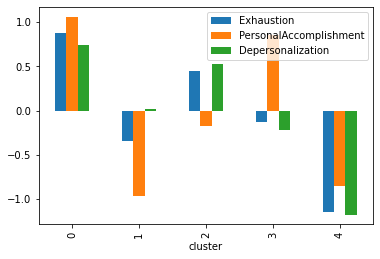

In [30]:
x=x[['Exhaustion','PersonalAccomplishment','Depersonalization']]
x.plot(kind = "bar")

In [31]:
final_df_cluster.groupby('cluster').median()

,index,skillDevelopment,salaryBenefits,workLifeBalance,workSatisfaction,jobSecurity,careerGrowth,companyCulture,Exhaustion,Depersonalization,PersonalAccomplishment
cluster,,,,,,,,,,,
0,50534.5,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.010914,0.886521,1.389852
1,42771.5,4.0,2.0,4.0,3.0,5.0,3.0,4.0,-0.292120,0.033134,-0.833636
2,43068.0,4.0,3.0,4.0,4.0,5.0,4.0,4.0,0.410295,0.527283,-0.088535
3,55058.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,-0.080933,-0.140120,0.666576
4,49218.0,3.0,2.0,3.0,2.0,4.0,2.0,2.0,-1.135458,-1.031825,-0.824098


In [32]:
data_final=data.merge(final_df_cluster[['index', 'Exhaustion', 'Depersonalization', 'PersonalAccomplishment', 'cluster']],on='index',how='left')

In [33]:
data_final.head()

,index,skillDevelopment,reviewText,cons,salaryBenefits,workLifeBalance,pros,workSatisfaction,postedon,jobSecurity,...,companyCulture,company,jobFunction,overallScore,file,cleaned_location,Exhaustion,Depersonalization,PersonalAccomplishment,cluster
0,0,1.0,Its good and managable only because of team.,Fake offers were given while recruiting. Wrong...,1.0,3.0,Only my collegues and work culture. There is n...,3.0,21-Apr-22,4.0,...,4.0,HCL Technologies,Hr Executive,1.0,hcl,Lucknow,-1.324421,-0.505241,-1.554899,1.0
1,1,4.0,Very balanced and rarely pressuring.,* Although it's WFH as of now but no general t...,2.0,5.0,Overall good experience for me! Very much secu...,4.0,16-Apr-22,5.0,...,3.0,HCL Technologies,Technical Lead,4.0,hcl,Noida,0.181301,0.346007,-0.825013,1.0
2,2,3.0,working hours are 9:30 hours no shift allowanc...,Management always listen what the manager sayi...,2.0,3.0,Job security is there Client or Customer centr...,1.0,20-Apr-22,4.0,...,2.0,HCL Technologies,Senior Specialist,3.0,hcl,Noida,-1.320864,-1.101628,-0.827405,4.0
3,3,1.0,Too bad for a mid level experienced. Enquire p...,Work culture is too bad and experienced so man...,1.0,2.0,It is a growing organization and has multiple ...,1.0,9-Dec-21,4.0,...,1.0,HCL Technologies,Senior Technical Lead,1.0,hcl,Chennai,-2.050294,-1.772570,-1.557231,4.0
4,4,1.0,Is there anything called work life balance her...,Why not paying your employees good!? .Stop ove...,4.0,1.0,"Hcl is avery good organization,But the middle ...",1.0,4-Mar-22,4.0,...,1.0,HCL Technologies,Software Engineer,1.0,hcl,Chennai,-1.859811,-2.083037,0.677617,4.0


### Method to calculate the percentage

In [38]:
def percent_calculation(df):
    df = df.groupby(['company','cleaned_location','cluster']).sum()[['PersonalAccomplishment','Exhaustion','Depersonalization']] 
    df['Total'] = df['PersonalAccomplishment'] +df['Exhaustion']+ df['Depersonalization']
    x = df[['Total']]
    min_max_scaler = preprocessing.MinMaxScaler()
    Total_Scaled = min_max_scaler.fit_transform(x)
    df['Total_Scaled'] = Total_Scaled
    df['Percent'] = 100* df['Total_Scaled']/df.groupby(['company','cleaned_location'])['Total_Scaled'].transform('sum')
    df['Percent']=df['Percent'].round(decimals = 2)
    return df

In [39]:
percent_calculation(data_final)

PersonalAccomplishment  Exhaustion  \
company          cleaned_location cluster                                       
HCL Technologies Ahmedabad        0.0                   10.360030    7.601884   
                                  1.0                   -3.181957   -0.721711   
                                  3.0                    0.665324   -0.897400   
                                  4.0                   -5.582957   -8.488733   
                 Bengaluru        0.0                  813.937491  673.942778   
...                                                           ...         ...   
Wipro            Thane            1.0                   -4.030017   -0.349777   
                                  2.0                   -0.318414    0.489793   
                                  3.0                   13.010029   -5.018402   
                                  4.0                  -28.924291  -47.231445   
                 Trivandrum       0.0                    0.650410    0.648460   

                                           Depersonalization        Total  \
company          cleaned_location cluster                                   
HCL Technologies Ahmedabad        0.0               6.557632    24.519547   
                                  1.0               0.861226    -3.042442   
                                  3.0              -0.919740    -1.151816   
                                  4.0              -8.054108   -22.125797   
                 Bengaluru        0.0             570.133284  2058.013554   
...                                                      ...          ...   
Wipro            Thane            1.0              -0.861106    -5.240900   
                                  2.0               1.237717     1.409096   
                                  3.0              -8.247854    -0.256227   
                                  4.0             -55.392289  -131.548026   
                 Trivandrum       0.0               0.851717     2.150587   

                                           Total_Scaled  Percent  
company          cleaned_location cluster                         
HCL Technologies Ahmedabad        0.0          0.514751    25.10  
                                  1.0          0.512458    24.99  
                                  3.0          0.512615    25.00  
                                  4.0          0.510870    24.91  
                 Bengaluru        0.0          0.683946    28.04  
...                                                 ...      ...  
Wipro            Thane            1.0          0.512275    19.95  
                                  2.0          0.512828    19.98  
                                  3.0          0.512690    19.97  
                                  4.0          0.501766    19.54  
                 Trivandrum       0.0          0.512890   100.00  

[414 rows x 6 columns]

In [123]:
def combined_score(df):
    df.set_index("cluster", inplace=True)
    medium_amber = df.iloc[[0, 1, 4]].percent.sum()
    not_burned_out_green = df.loc[[2]].percent.sum()
    burned_out_red = df.iloc[[3]].percent.sum()
    return medium_amber,not_burned_out_green,burned_out_red

In [ ]:
def recommend(medium_amber,not_burned_out_green,burned_out_red):
    
    if (medium_amber>0 and medium_amber<=40):
        return( "")
    elif(medium_amber>40 and medium_amber<=60):
        return("")
    elif(medium_amber>60 and medium_amber<=80):
        return("")
    else(medium_amber>80 and medium_amber<=100):
        return("")
    
    
        
    
    